In [1]:
import argparse
import glob
import json
import random
import subprocess
import sys
from pathlib import Path
import os
from collections import namedtuple
import json
from mstuff.mstuff import obj
from statistics import mean,mode
import matplotlib.pyplot as plt
from assertpy import assert_that
from types import SimpleNamespace
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import MultipleLocator, FixedLocator
import numpy as np
from tabulate import tabulate
import matplotlib
import matplotlib.ticker as mtick
this_file = Path(os.path.abspath('')).joinpath('image_viewer.ipynb')

ImportError: cannot import name 'obj' from 'mstuff.mstuff' (/Users/matthewgroth/registered/ide/all/k/mstuff/src/main/python/mstuff/mstuff.py)

In [2]:
    subprocess.run(
        args=["/Users/matthewgroth/registered/ide/all/gradlew", ":k:oexp:oexpGenSources"],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL,
        stdin=subprocess.DEVNULL,
        cwd="/Users/matthewgroth/registered/ide/all/",
        check=True
    )
    sys.path.insert(0,
                    str(this_file.parent.parent.parent.parent.parent.parent.joinpath("src").joinpath("main").joinpath(
                        "python")))
    import oexp
    import oexp.jbridge

    oexp.jbridge.LOCAL_JAR = "/Users/matthewgroth/registered/ide/all/k/oexp/front/build/libs/oexp-front-0-all.jar"

In [3]:
with open(this_file.parent.parent.joinpath(".auth.json")) as f:
    auth_json = json.loads(f.read())

user = oexp.login(auth_json["username"], auth_json["password"])
exp = user.experiment("image_viewer")

In [4]:
data = exp.subject_data()

In [5]:
odata = data.to_data()

In [6]:
list(map(lambda s: s.id,odata.subjects))

['test-michal',
 'test-realmichal',
 'test-suayb',
 'test-pawan',
 'test-hojin',
 'test-joydeep']

In [176]:
NUM_TRIALS = 120

def analyze_subject(sub):
    result = SimpleNamespace()
    events = sub.events
    name = sub.id
    events = [e for e in events if e.type == "SubjectTrialData"]
    events.sort(key=lambda e: e.trialIndex)
    assert_that(len(events)).is_equal_to(NUM_TRIALS)
    assert all([len(e.log) == 1 for e in events])
    presses =  [e.log[0] for e in events]
    result.times = [p.timeMillis / 1000 for p in presses]
    result.responses = [e.response.choice for e in events]
    return result
results = []
for sub in odata.subjects:
    if sub.id != "test-michal":
        results.append(analyze_subject(sub)) 
        

x = [i + 1 for r in results for i,rr in enumerate(r.responses)]
y = [c for r in results for c in r.responses]


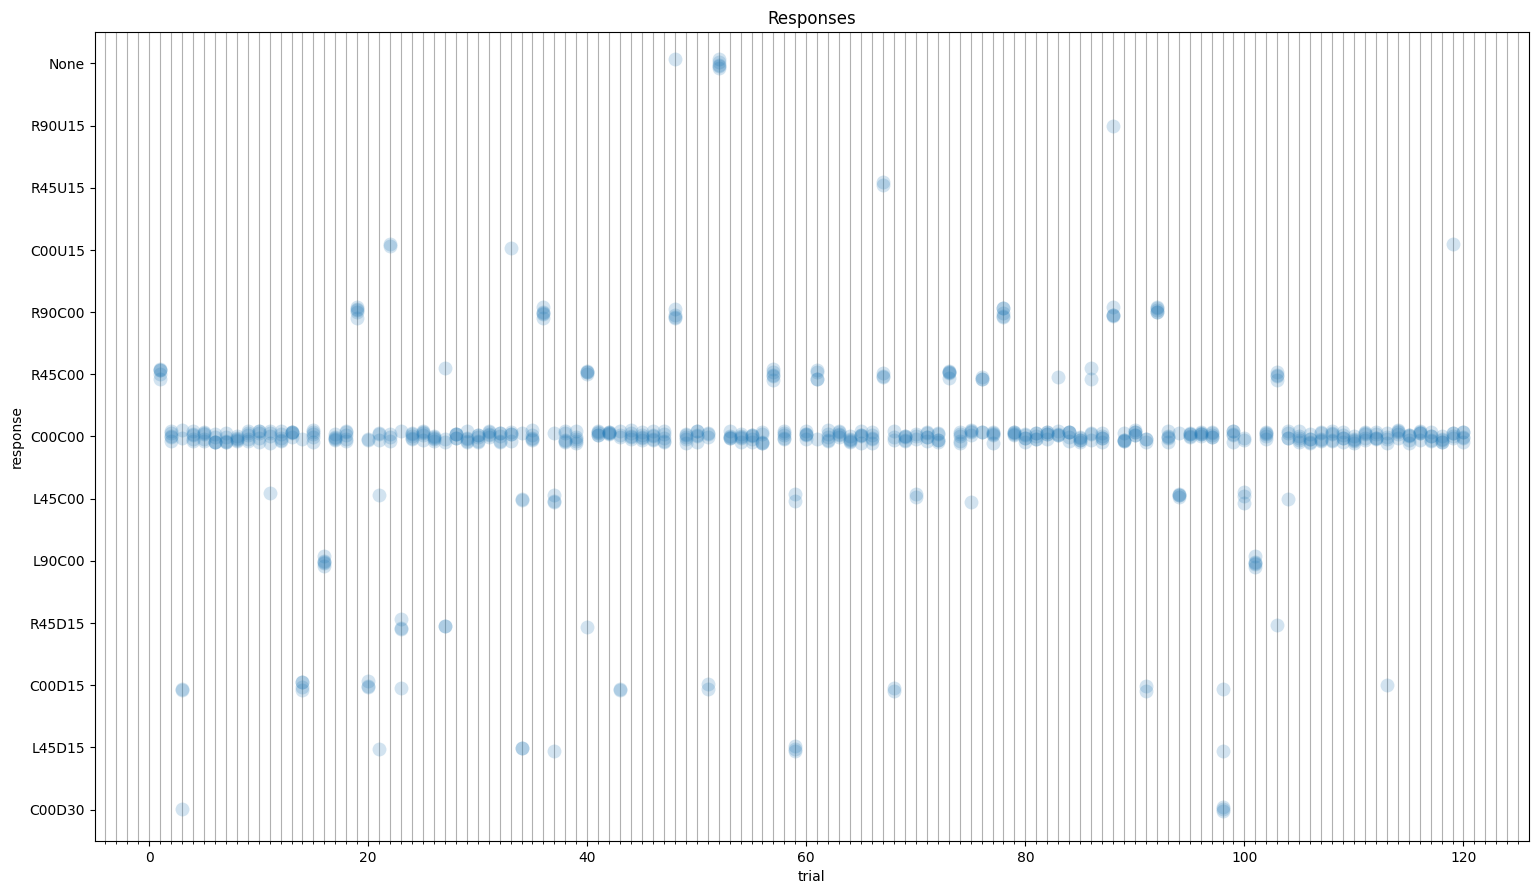

In [177]:
def custom_comparator(value):
    if (value == None or value == "None"):
        return -10000000
    r = 0

    up = "U" in value
    left = "R" in value

    yaw = int(value[1:3])
    pitch = int(value[4:])

    p_value = pitch * 1000
    if up: p_value *= -1
    y_value = yaw
    if left: y_value *= -1
    return p_value + y_value

sorted_labels = sorted(set(y),key=custom_comparator)

sns.stripplot(
x=    x,
  y=  y,
    s = 10,
    alpha = 0.2,
    order = sorted_labels
    

)

plt.grid(True,axis="x",which="both")

minorLocator = MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minorLocator)
plt.xlabel("trial")
plt.ylabel("response")
plt.title("Responses")

plt.gcf().set_size_inches(18.5,10.5)

([<matplotlib.axis.YTick at 0x7f8844fe8280>,
 [Text(0, 40, '40%'),
  Text(0, 60, '60%'),
  Text(0, 80, '80%'),
  Text(0, 100, '100%')])

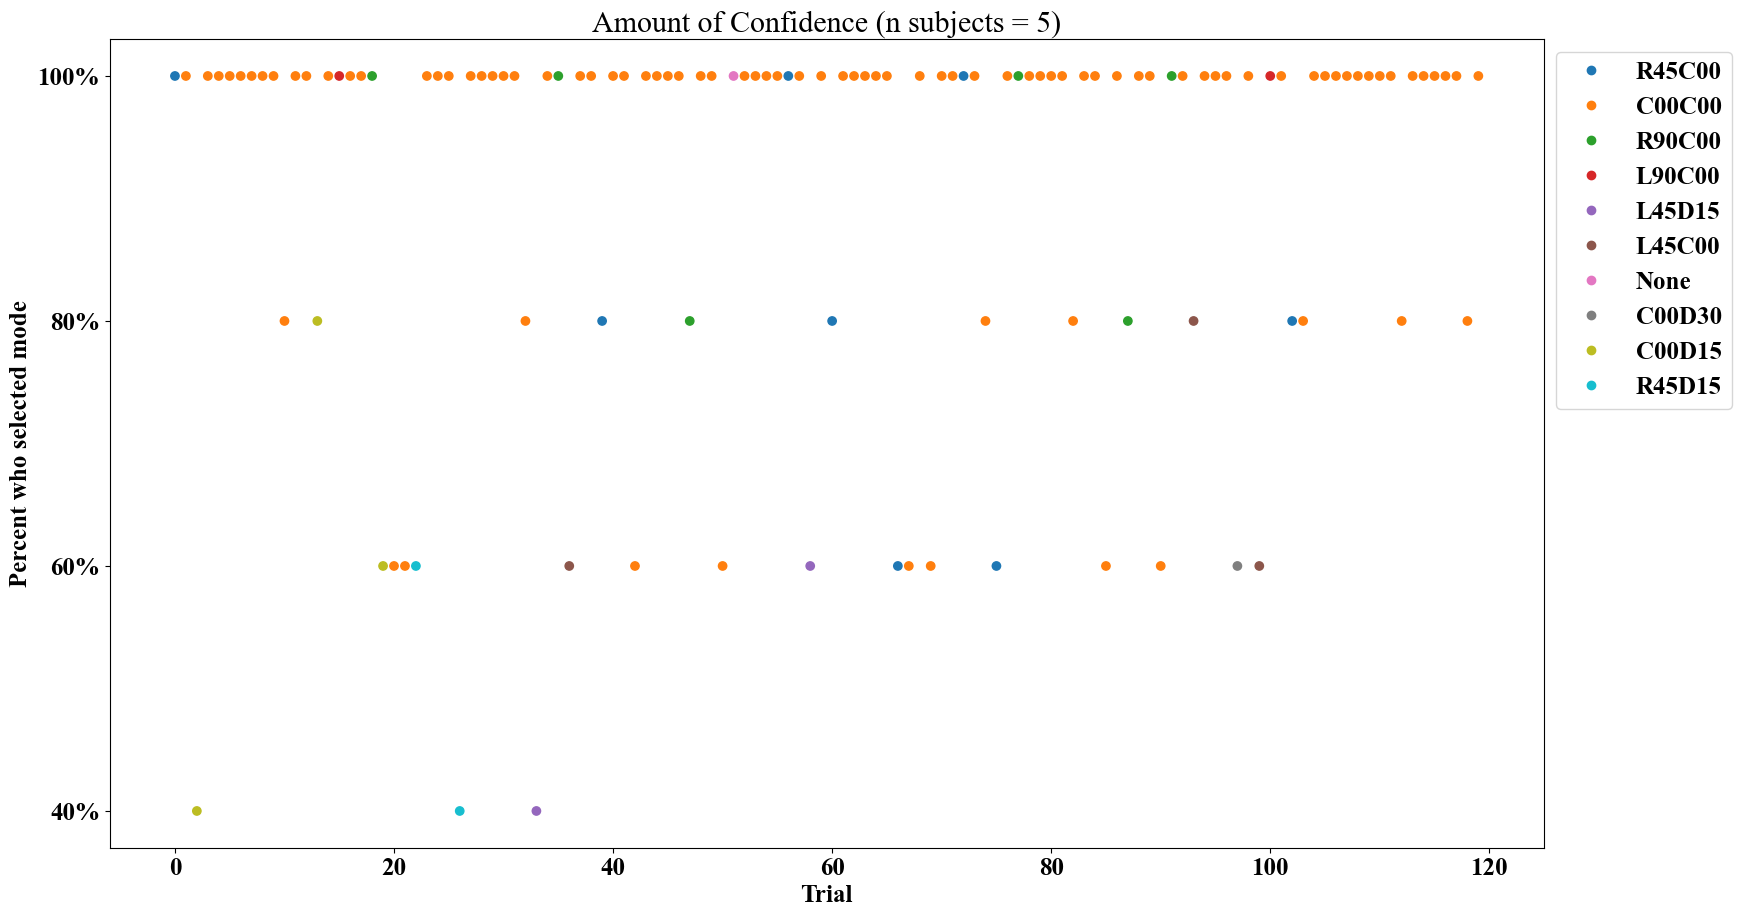

In [246]:
agrees_winners = []
agrees_x = []
agrees_y = []
agrees_c = []


font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)


for n in range(NUM_TRIALS):
    resps = [r.responses[n] for r in results]
    winner = mode(resps)
    agrees_y.append(resps.count(winner) / 5 * 100)
    agrees_winners.append(winner)
    agrees_x.append(n)
    
answer_set_list = list(set(agrees_winners))    

cmap = plt.get_cmap('tab10', len(answer_set_list))
agrees_c = [answer_set_list.index(w) for w in agrees_winners]
    
scatter = plt.scatter(x=agrees_x,y=agrees_y,c=agrees_c,cmap=cmap)


# plt.legend(answer_set_list)
# plt.colorbar(scatter, ticks=answer_set_list, label='Labels')


legend_elements = scatter.legend_elements()
legend_labels = answer_set_list
plt.legend(legend_elements[0], legend_labels,bbox_to_anchor=(1,1))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.gcf().set_size_inches(18.5,10.5)


plt.xlabel("Trial")
plt.ylabel("Percent who selected mode")
plt.title("Amount of Confidence (n subjects = 5)")
plt.yticks([40,60,80,100])


Text(0.5, 1.0, 'Confidence Per Response Mode')

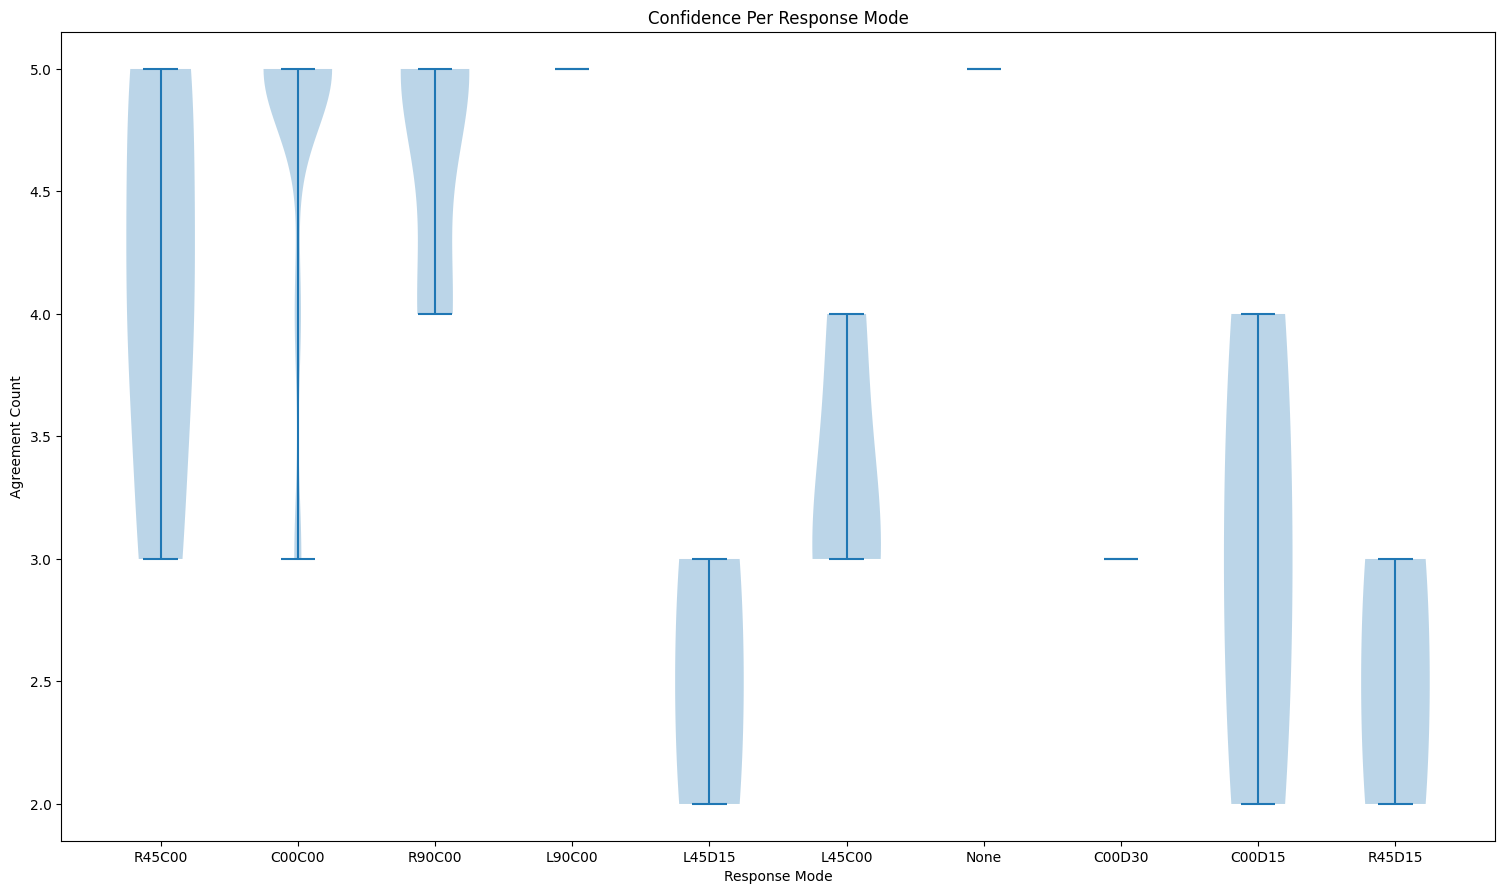

In [231]:
agrees_per_w = {w: [] for w in answer_set_list}
for i,w in enumerate(agrees_winners):
    agrees_per_w[w].append(agrees_y[i])

items = list(agrees_per_w.items())
values = [v for k,v in items]   


plt.violinplot(values)
ax = plt.gca()
labels = []
for i,t in enumerate(answer_set_list):
    labels.append(t)
x_locs = np.array(range(len(labels))) + 1
plt.gca().xaxis.set_minor_locator(FixedLocator(x_locs))
plt.gca().xaxis.set_major_locator(FixedLocator(x_locs))
ax.set_xticklabels(labels) 

plt.xticks(x_locs)
plt.gcf().set_size_inches(18.5,10.5)

plt.xlabel("Response Mode")
plt.ylabel("Agreement Count")
plt.title("Confidence Per Response Mode")


labels=[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), 'all', Text(7, 0, '7'), Text(8, 0, '8')]


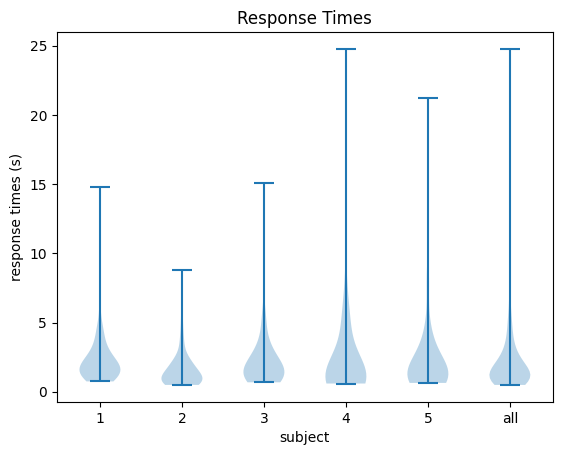

In [215]:
result = SimpleNamespace()
result.times = [t for r in results for t in r.times]
results_with_all = results.copy()
results_with_all.append(result)

plt.violinplot([r.times for r in results_with_all])
plt.title("Response Times")
plt.xlabel("subject")
plt.ylabel("response times (s)")
ax = plt.gca()

x_locs = np.array(range(len(labels))) + 1
# plt.gca().xaxis.set_minor_locator(FixedLocator(x_locs))
plt.gca().xaxis.set_major_locator(FixedLocator(x_locs))
labels = ax.get_xticklabels()
labels[5] = 'all'
print(f"{labels=}")
ax.set_xticklabels(labels)


None





labels=[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), 'all', Text(7, 0, '7'), Text(8, 0, '8'), Text(9, 0, '9'), Text(10, 0, '10')]


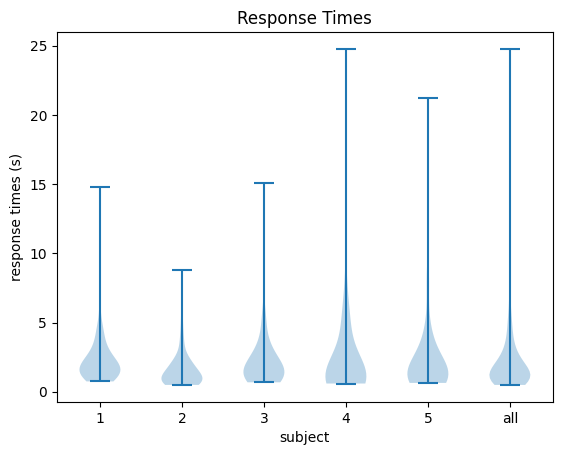

In [229]:

result.times = [t for r in results for t in r.times]
results_with_all = results.copy()
results_with_all.append(result)

plt.violinplot([r.times for r in results_with_all])
plt.title("Response Times")
plt.xlabel("subject")
plt.ylabel("response times (s)")
ax = plt.gca()

x_locs = np.array(range(len(labels))) + 1
# plt.gca().xaxis.set_minor_locator(FixedLocator(x_locs))
plt.gca().xaxis.set_major_locator(FixedLocator(x_locs))
labels = ax.get_xticklabels()
labels[5] = 'all'
print(f"{labels=}")
ax.set_xticklabels(labels)


None




In [228]:
mean_response_time = mean(t for r in results for t in r.times)


print(tabulate([["Mean Response Time",f"{mean_response_time}s"]]))

------------------  --------
Mean Response Time  2.29281s
------------------  --------
